# Yoga Pose Detection - Exploratory Data Analysis (EDA)

This notebook performs comprehensive exploratory data analysis on the yoga pose dataset to understand:
- Dataset structure and organization
- Number of images per yoga pose class
- Class distribution and potential imbalances
- Image resolution consistency
- Sample visualizations of each pose

## Dataset Overview
The dataset contains 5 yoga pose classes:
- **downdog**: Downward-facing dog pose
- **goddess**: Goddess pose
- **plank**: Plank pose
- **tree**: Tree pose
- **warrior2**: Warrior II pose

In [26]:
# Import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [27]:
# Define dataset paths
DATASET_PATH = r"C:\Users\HARSHITHA\projects\jupyter_projects\yoga_pose_detection\raw_data\DATASET"
TRAIN_PATH = os.path.join(DATASET_PATH, "TRAIN")
TEST_PATH = os.path.join(DATASET_PATH, "TEST")

# Define yoga pose classes
CLASSES = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']

print(f"Dataset path: {DATASET_PATH}")
print(f"Training path: {TRAIN_PATH}")
print(f"Testing path: {TEST_PATH}")
print(f"Number of classes: {len(CLASSES)}")
print(f"Classes: {CLASSES}")

# Verify paths exist
print(f"\nPath verification:")
print(f"Dataset exists: {os.path.exists(DATASET_PATH)}")
print(f"Train folder exists: {os.path.exists(TRAIN_PATH)}")
print(f"Test folder exists: {os.path.exists(TEST_PATH)}")

Dataset path: C:\Users\HARSHITHA\projects\jupyter_projects\yoga_pose_detection\raw_data\DATASET
Training path: C:\Users\HARSHITHA\projects\jupyter_projects\yoga_pose_detection\raw_data\DATASET\TRAIN
Testing path: C:\Users\HARSHITHA\projects\jupyter_projects\yoga_pose_detection\raw_data\DATASET\TEST
Number of classes: 5
Classes: ['downdog', 'goddess', 'plank', 'tree', 'warrior2']

Path verification:
Dataset exists: True
Train folder exists: True
Test folder exists: True


In [28]:
# Function to count images in each class
def count_images_per_class(data_path, classes):
    """Count the number of images in each class folder"""
    class_counts = {}
    
    for class_name in classes:
        class_path = os.path.join(data_path, class_name)
        if os.path.exists(class_path):
            # Count all image files (jpg, jpeg, png)
            image_files = [f for f in os.listdir(class_path) 
                          if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            class_counts[class_name] = len(image_files)
        else:
            class_counts[class_name] = 0
            print(f"Warning: {class_path} does not exist")
    
    return class_counts

# Count images in training and test sets
train_counts = count_images_per_class(TRAIN_PATH, CLASSES)
test_counts = count_images_per_class(TEST_PATH, CLASSES)

print("Training set image counts:")
for class_name, count in train_counts.items():
    print(f"  {class_name}: {count} images")

print("\nTest set image counts:")
for class_name, count in test_counts.items():
    print(f"  {class_name}: {count} images")

print(f"\nTotal training images: {sum(train_counts.values())}")
print(f"Total test images: {sum(test_counts.values())}")
print(f"Total images: {sum(train_counts.values()) + sum(test_counts.values())}")

Training set image counts:
  downdog: 222 images
  goddess: 180 images
  plank: 266 images
  tree: 160 images
  warrior2: 252 images

Test set image counts:
  downdog: 97 images
  goddess: 80 images
  plank: 115 images
  tree: 69 images
  warrior2: 109 images

Total training images: 1080
Total test images: 470
Total images: 1550


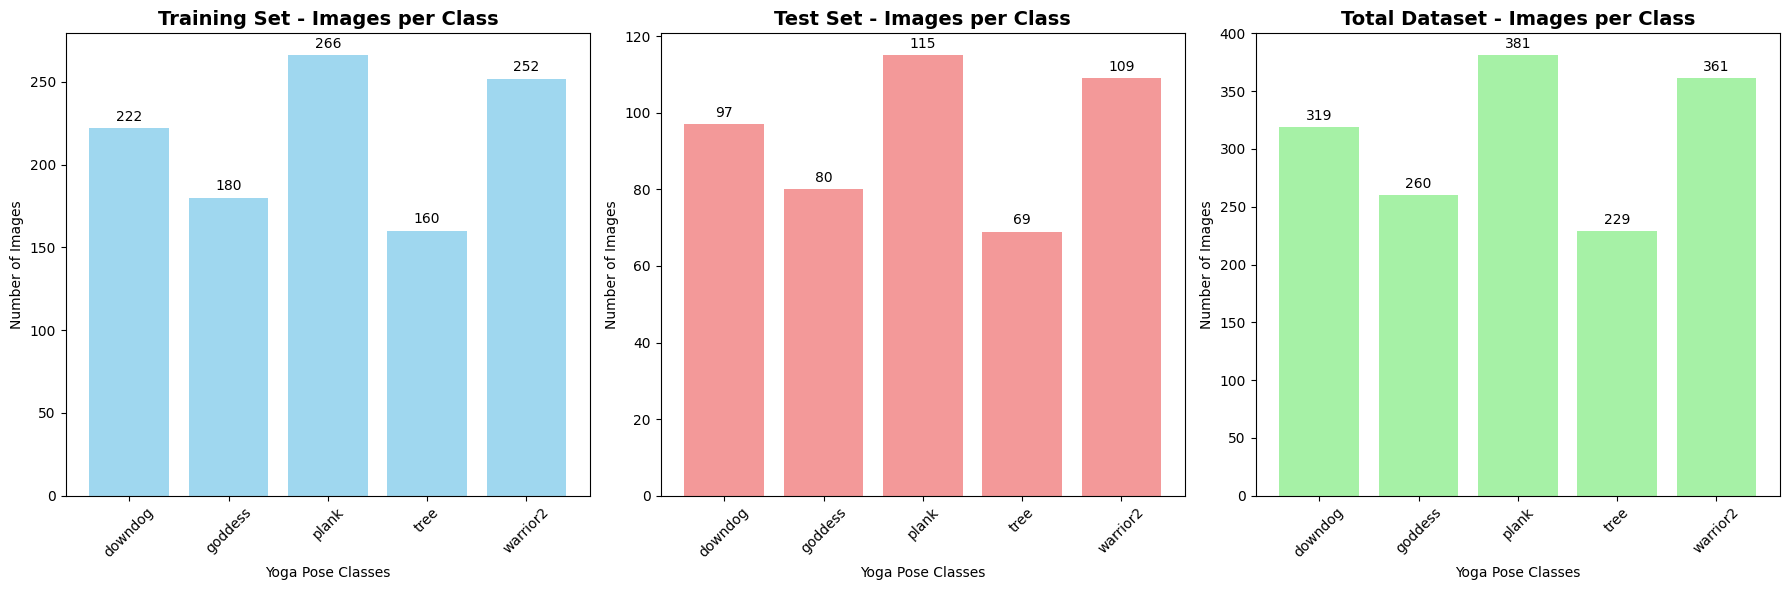


CLASS IMBALANCE ANALYSIS

Training Set Imbalance:
  Max class size: 266
  Min class size: 160
  Imbalance ratio: 1.66

Test Set Imbalance:
  Max class size: 115
  Min class size: 69
  Imbalance ratio: 1.67

Overall Dataset Imbalance:
  Max class size: 381
  Min class size: 229
  Imbalance ratio: 1.66

✅ Dataset appears to be relatively balanced.


In [29]:
# Visualize class distribution
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Training set distribution
ax1.bar(train_counts.keys(), train_counts.values(), color='skyblue', alpha=0.8)
ax1.set_title('Training Set - Images per Class', fontsize=14, fontweight='bold')
ax1.set_xlabel('Yoga Pose Classes')
ax1.set_ylabel('Number of Images')
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(train_counts.values()):
    ax1.text(i, v + max(train_counts.values()) * 0.01, str(v), ha='center', va='bottom')

# Test set distribution
ax2.bar(test_counts.keys(), test_counts.values(), color='lightcoral', alpha=0.8)
ax2.set_title('Test Set - Images per Class', fontsize=14, fontweight='bold')
ax2.set_xlabel('Yoga Pose Classes')
ax2.set_ylabel('Number of Images')
ax2.tick_params(axis='x', rotation=45)
for i, v in enumerate(test_counts.values()):
    ax2.text(i, v + max(test_counts.values()) * 0.01, str(v), ha='center', va='bottom')

# Combined distribution
total_counts = {class_name: train_counts[class_name] + test_counts[class_name] 
                for class_name in CLASSES}
ax3.bar(total_counts.keys(), total_counts.values(), color='lightgreen', alpha=0.8)
ax3.set_title('Total Dataset - Images per Class', fontsize=14, fontweight='bold')
ax3.set_xlabel('Yoga Pose Classes')
ax3.set_ylabel('Number of Images')
ax3.tick_params(axis='x', rotation=45)
for i, v in enumerate(total_counts.values()):
    ax3.text(i, v + max(total_counts.values()) * 0.01, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Calculate class imbalance metrics
print("\n" + "="*50)
print("CLASS IMBALANCE ANALYSIS")
print("="*50)

# Training set imbalance
train_max = max(train_counts.values())
train_min = min(train_counts.values())
train_imbalance_ratio = train_max / train_min if train_min > 0 else float('inf')

print(f"\nTraining Set Imbalance:")
print(f"  Max class size: {train_max}")
print(f"  Min class size: {train_min}")
print(f"  Imbalance ratio: {train_imbalance_ratio:.2f}")

# Test set imbalance
test_max = max(test_counts.values())
test_min = min(test_counts.values())
test_imbalance_ratio = test_max / test_min if test_min > 0 else float('inf')

print(f"\nTest Set Imbalance:")
print(f"  Max class size: {test_max}")
print(f"  Min class size: {test_min}")
print(f"  Imbalance ratio: {test_imbalance_ratio:.2f}")

# Overall dataset imbalance
total_max = max(total_counts.values())
total_min = min(total_counts.values())
total_imbalance_ratio = total_max / total_min if total_min > 0 else float('inf')

print(f"\nOverall Dataset Imbalance:")
print(f"  Max class size: {total_max}")
print(f"  Min class size: {total_min}")
print(f"  Imbalance ratio: {total_imbalance_ratio:.2f}")

if total_imbalance_ratio > 2:
    print("\n⚠️  WARNING: Significant class imbalance detected!")
    print("   Consider using techniques like data augmentation, class weighting, or resampling.")
else:
    print("\n✅ Dataset appears to be relatively balanced.")

In [30]:
# Function to analyze image resolutions
def analyze_image_resolutions(data_path, classes, sample_size=50):
    """Analyze image resolutions across all classes"""
    resolutions = []
    widths = []
    heights = []
    aspect_ratios = []
    file_sizes = []
    
    print("Analyzing image resolutions...")
    
    for class_name in classes:
        class_path = os.path.join(data_path, class_name)
        if not os.path.exists(class_path):
            continue
            
        image_files = [f for f in os.listdir(class_path) 
                      if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        # Sample images to avoid processing too many
        if len(image_files) > sample_size:
            import random
            image_files = random.sample(image_files, sample_size)
        
        for img_file in image_files:
            img_path = os.path.join(class_path, img_file)
            try:
                # Get image dimensions
                with Image.open(img_path) as img:
                    width, height = img.size
                    widths.append(width)
                    heights.append(height)
                    resolutions.append(f"{width}x{height}")
                    aspect_ratios.append(width / height)
                
                # Get file size
                file_size = os.path.getsize(img_path) / 1024  # KB
                file_sizes.append(file_size)
                
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
    
    return {
        'resolutions': resolutions,
        'widths': widths,
        'heights': heights,
        'aspect_ratios': aspect_ratios,
        'file_sizes': file_sizes
    }

# Analyze training set resolutions
print("Analyzing training set...")
train_analysis = analyze_image_resolutions(TRAIN_PATH, CLASSES, sample_size=30)

print(f"\nAnalyzed {len(train_analysis['widths'])} training images")

# Basic statistics
print("\n" + "="*50)
print("IMAGE RESOLUTION ANALYSIS")
print("="*50)

print(f"\nWidth Statistics:")
print(f"  Min: {min(train_analysis['widths'])}px")
print(f"  Max: {max(train_analysis['widths'])}px")
print(f"  Mean: {np.mean(train_analysis['widths']):.1f}px")
print(f"  Median: {np.median(train_analysis['widths'])}px")

print(f"\nHeight Statistics:")
print(f"  Min: {min(train_analysis['heights'])}px")
print(f"  Max: {max(train_analysis['heights'])}px")
print(f"  Mean: {np.mean(train_analysis['heights']):.1f}px")
print(f"  Median: {np.median(train_analysis['heights'])}px")

print(f"\nAspect Ratio Statistics:")
print(f"  Min: {min(train_analysis['aspect_ratios']):.2f}")
print(f"  Max: {max(train_analysis['aspect_ratios']):.2f}")
print(f"  Mean: {np.mean(train_analysis['aspect_ratios']):.2f}")
print(f"  Median: {np.median(train_analysis['aspect_ratios']):.2f}")

print(f"\nFile Size Statistics (KB):")
print(f"  Min: {min(train_analysis['file_sizes']):.1f}KB")
print(f"  Max: {max(train_analysis['file_sizes']):.1f}KB")
print(f"  Mean: {np.mean(train_analysis['file_sizes']):.1f}KB")
print(f"  Median: {np.median(train_analysis['file_sizes']):.1f}KB")

# Check for common resolutions
resolution_counter = Counter(train_analysis['resolutions'])
print(f"\nMost Common Resolutions:")
for resolution, count in resolution_counter.most_common(10):
    print(f"  {resolution}: {count} images")

Analyzing training set...
Analyzing image resolutions...

Analyzed 150 training images

IMAGE RESOLUTION ANALYSIS

Width Statistics:
  Min: 75px
  Max: 6410px
  Mean: 959.0px
  Median: 740.0px

Height Statistics:
  Min: 75px
  Max: 4032px
  Mean: 820.0px
  Median: 547.5px

Aspect Ratio Statistics:
  Min: 0.40
  Max: 2.67
  Mean: 1.26
  Median: 1.33

File Size Statistics (KB):
  Min: 1.8KB
  Max: 2878.5KB
  Mean: 188.0KB
  Median: 66.9KB

Most Common Resolutions:
  800x533: 2 images
  1920x1080: 2 images
  957x1300: 2 images
  620x349: 2 images
  278x278: 2 images
  600x450: 2 images
  1300x957: 2 images
  1080x720: 2 images
  200x300: 2 images
  1200x630: 2 images


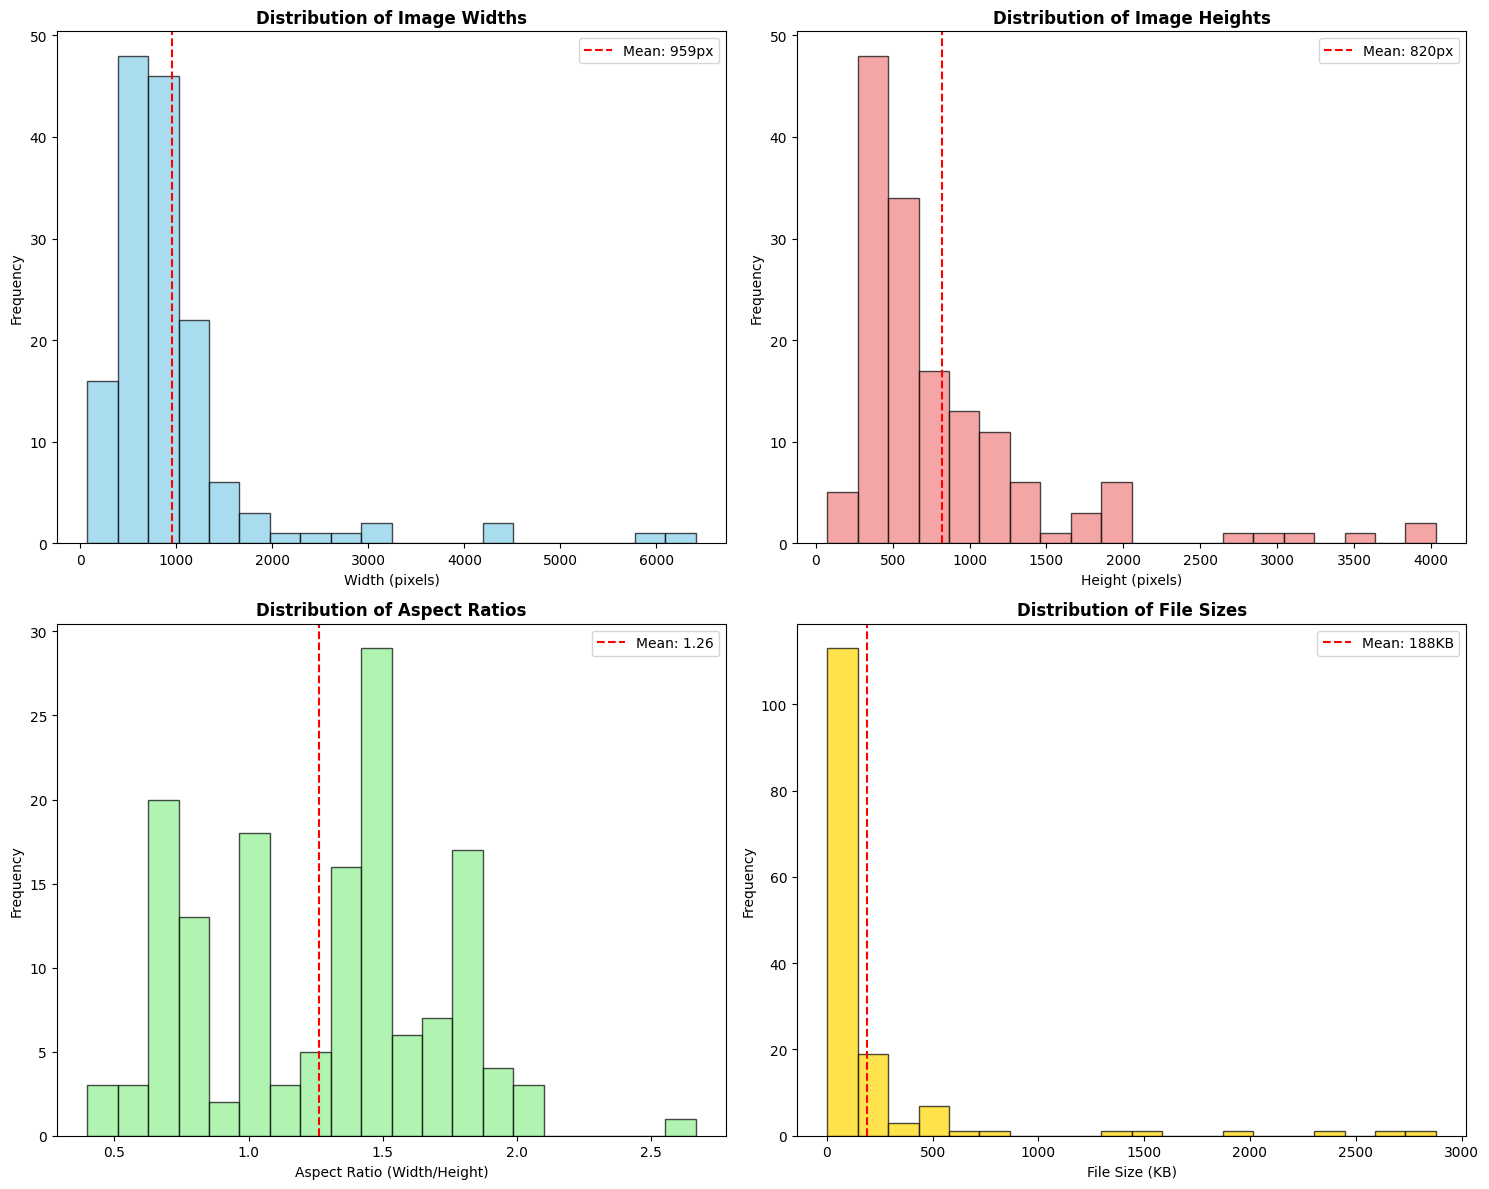


RESOLUTION CONSISTENCY ANALYSIS

Total unique resolutions: 130
Total images analyzed: 150
Resolution diversity: 0.87

⚠️  HIGH RESOLUTION DIVERSITY detected!
   Images have many different resolutions. Consider:
   - Standardizing image sizes during preprocessing
   - Using data augmentation for consistent input sizes

Aspect Ratio Analysis:
  Square (1:1): 18 images (12.0%)
  Standard (4:3): 16 images (10.7%)
  Widescreen (16:9): 18 images (12.0%)
  Portrait (3:4): 18 images (12.0%)


In [31]:
# Visualize resolution distributions
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Width distribution
ax1.hist(train_analysis['widths'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Distribution of Image Widths', fontweight='bold')
ax1.set_xlabel('Width (pixels)')
ax1.set_ylabel('Frequency')
ax1.axvline(np.mean(train_analysis['widths']), color='red', linestyle='--', 
           label=f'Mean: {np.mean(train_analysis["widths"]):.0f}px')
ax1.legend()

# Height distribution
ax2.hist(train_analysis['heights'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_title('Distribution of Image Heights', fontweight='bold')
ax2.set_xlabel('Height (pixels)')
ax2.set_ylabel('Frequency')
ax2.axvline(np.mean(train_analysis['heights']), color='red', linestyle='--', 
           label=f'Mean: {np.mean(train_analysis["heights"]):.0f}px')
ax2.legend()

# Aspect ratio distribution
ax3.hist(train_analysis['aspect_ratios'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
ax3.set_title('Distribution of Aspect Ratios', fontweight='bold')
ax3.set_xlabel('Aspect Ratio (Width/Height)')
ax3.set_ylabel('Frequency')
ax3.axvline(np.mean(train_analysis['aspect_ratios']), color='red', linestyle='--', 
           label=f'Mean: {np.mean(train_analysis["aspect_ratios"]):.2f}')
ax3.legend()

# File size distribution
ax4.hist(train_analysis['file_sizes'], bins=20, alpha=0.7, color='gold', edgecolor='black')
ax4.set_title('Distribution of File Sizes', fontweight='bold')
ax4.set_xlabel('File Size (KB)')
ax4.set_ylabel('Frequency')
ax4.axvline(np.mean(train_analysis['file_sizes']), color='red', linestyle='--', 
           label=f'Mean: {np.mean(train_analysis["file_sizes"]):.0f}KB')
ax4.legend()

plt.tight_layout()
plt.show()

# Resolution consistency analysis
unique_resolutions = len(set(train_analysis['resolutions']))
total_images = len(train_analysis['resolutions'])

print("\n" + "="*50)
print("RESOLUTION CONSISTENCY ANALYSIS")
print("="*50)

print(f"\nTotal unique resolutions: {unique_resolutions}")
print(f"Total images analyzed: {total_images}")
print(f"Resolution diversity: {unique_resolutions/total_images:.2f}")

if unique_resolutions/total_images > 0.5:
    print("\n⚠️  HIGH RESOLUTION DIVERSITY detected!")
    print("   Images have many different resolutions. Consider:")
    print("   - Standardizing image sizes during preprocessing")
    print("   - Using data augmentation for consistent input sizes")
else:
    print("\n✅ MODERATE RESOLUTION DIVERSITY")
    print("   Resolution variation is manageable.")

# Check for standard aspect ratios
common_ratios = {
    'Square (1:1)': (0.95, 1.05),
    'Standard (4:3)': (1.28, 1.38),
    'Widescreen (16:9)': (1.75, 1.85),
    'Portrait (3:4)': (0.72, 0.82)
}

print(f"\nAspect Ratio Analysis:")
for ratio_name, (min_ratio, max_ratio) in common_ratios.items():
    count = sum(1 for ar in train_analysis['aspect_ratios'] 
                if min_ratio <= ar <= max_ratio)
    percentage = (count / len(train_analysis['aspect_ratios'])) * 100
    print(f"  {ratio_name}: {count} images ({percentage:.1f}%)")

Displaying sample images from training set...


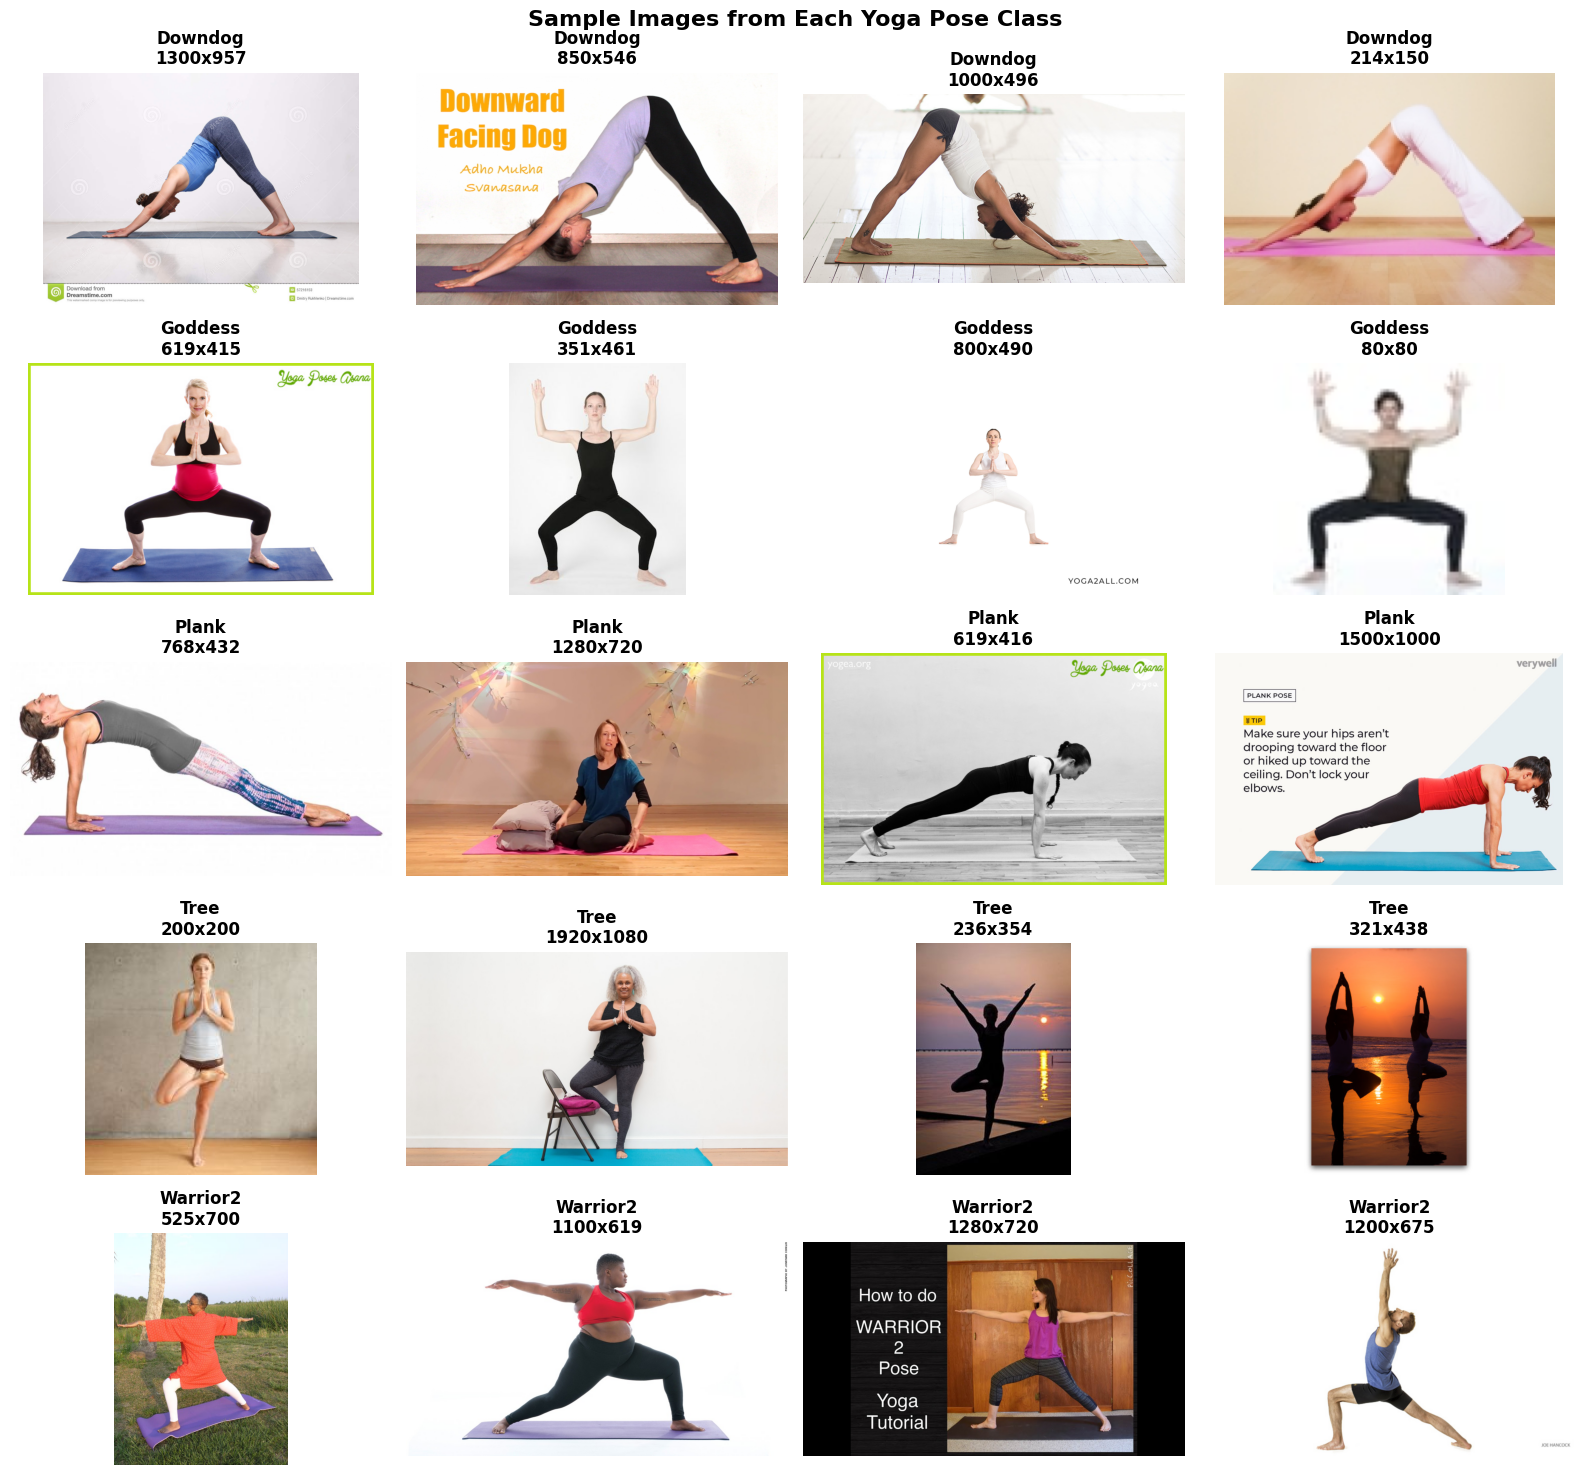

In [32]:
# Function to display sample images from each class
def display_sample_images(data_path, classes, samples_per_class=3):
    """Display sample images from each yoga pose class"""
    
    fig, axes = plt.subplots(len(classes), samples_per_class, 
                            figsize=(samples_per_class * 4, len(classes) * 3))
    
    if len(classes) == 1:
        axes = axes.reshape(1, -1)
    
    for i, class_name in enumerate(classes):
        class_path = os.path.join(data_path, class_name)
        
        if not os.path.exists(class_path):
            continue
        
        # Get random sample of images
        image_files = [f for f in os.listdir(class_path) 
                      if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        if len(image_files) == 0:
            continue
            
        # Select random samples
        import random
        sample_files = random.sample(image_files, 
                                   min(samples_per_class, len(image_files)))
        
        for j, img_file in enumerate(sample_files):
            img_path = os.path.join(class_path, img_file)
            
            try:
                # Load and display image
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
                axes[i, j].imshow(img)
                axes[i, j].set_title(f'{class_name.title()}\n{img.shape[1]}x{img.shape[0]}', 
                                    fontweight='bold')
                axes[i, j].axis('off')
                
            except Exception as e:
                axes[i, j].text(0.5, 0.5, f'Error loading\n{img_file}', 
                               ha='center', va='center', transform=axes[i, j].transAxes)
                axes[i, j].axis('off')
        
        # Hide empty subplots if we have fewer samples
        for j in range(len(sample_files), samples_per_class):
            axes[i, j].axis('off')
    
    plt.suptitle('Sample Images from Each Yoga Pose Class', 
                 fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()

# Display sample images from training set
print("Displaying sample images from training set...")
display_sample_images(TRAIN_PATH, CLASSES, samples_per_class=4)

In [33]:
# Create comprehensive dataset summary
def create_dataset_summary():
    """Create a comprehensive summary of the dataset"""
    
    # Calculate total dataset size
    total_train = sum(train_counts.values())
    total_test = sum(test_counts.values())
    total_images = total_train + total_test
    
    # Create summary DataFrame
    summary_data = []
    for class_name in CLASSES:
        train_count = train_counts[class_name]
        test_count = test_counts[class_name]
        total_count = train_count + test_count
        
        train_percentage = (train_count / total_train) * 100 if total_train > 0 else 0
        test_percentage = (test_count / total_test) * 100 if total_test > 0 else 0
        total_percentage = (total_count / total_images) * 100 if total_images > 0 else 0
        
        summary_data.append({
            'Class': class_name.title(),
            'Train Images': train_count,
            'Train %': f"{train_percentage:.1f}%",
            'Test Images': test_count,
            'Test %': f"{test_percentage:.1f}%",
            'Total Images': total_count,
            'Total %': f"{total_percentage:.1f}%"
        })
    
    # Add totals row
    summary_data.append({
        'Class': 'TOTAL',
        'Train Images': total_train,
        'Train %': '100.0%',
        'Test Images': total_test,
        'Test %': '100.0%',
        'Total Images': total_images,
        'Total %': '100.0%'
    })
    
    df_summary = pd.DataFrame(summary_data)
    
    print("="*80)
    print("COMPREHENSIVE DATASET SUMMARY")
    print("="*80)
    print(df_summary.to_string(index=False))
    
    return df_summary

# Generate dataset summary
summary_df = create_dataset_summary()

# Dataset quality assessment
print("\n" + "="*80)
print("DATASET QUALITY ASSESSMENT")
print("="*80)

# Calculate metrics
train_split_ratio = sum(train_counts.values()) / (sum(train_counts.values()) + sum(test_counts.values()))
test_split_ratio = sum(test_counts.values()) / (sum(train_counts.values()) + sum(test_counts.values()))

print(f"\n📊 Dataset Split:")
print(f"  Training: {train_split_ratio:.1%}")
print(f"  Testing: {test_split_ratio:.1%}")

# Assess split quality
if 0.7 <= train_split_ratio <= 0.8:
    print("  ✅ Good train/test split ratio")
elif 0.6 <= train_split_ratio <= 0.9:
    print("  ⚠️  Acceptable train/test split ratio")
else:
    print("  ❌ Suboptimal train/test split ratio")

# Class balance assessment
total_counts = {class_name: train_counts[class_name] + test_counts[class_name] 
                for class_name in CLASSES}
max_class_size = max(total_counts.values())
min_class_size = min(total_counts.values())
imbalance_ratio = max_class_size / min_class_size if min_class_size > 0 else float('inf')

print(f"\n⚖️  Class Balance:")
print(f"  Imbalance ratio: {imbalance_ratio:.2f}")

if imbalance_ratio <= 1.5:
    print("  ✅ Well-balanced dataset")
elif imbalance_ratio <= 3.0:
    print("  ⚠️  Moderate imbalance - manageable")
else:
    print("  ❌ Significant imbalance - requires attention")

# Dataset size assessment
total_size = sum(total_counts.values())
print(f"\n📈 Dataset Size:")
print(f"  Total images: {total_size}")

if total_size >= 1000:
    print("  ✅ Good dataset size for deep learning")
elif total_size >= 500:
    print("  ⚠️  Moderate dataset size - consider augmentation")
else:
    print("  ❌ Small dataset - strong augmentation recommended")

# Resolution consistency assessment
if 'train_analysis' in locals():
    unique_res_ratio = len(set(train_analysis['resolutions'])) / len(train_analysis['resolutions'])
    print(f"\n🖼️  Image Resolution:")
    print(f"  Resolution diversity: {unique_res_ratio:.2f}")
    
    if unique_res_ratio <= 0.3:
        print("  ✅ Consistent image resolutions")
    elif unique_res_ratio <= 0.6:
        print("  ⚠️  Moderate resolution diversity")
    else:
        print("  ❌ High resolution diversity - preprocessing needed")

COMPREHENSIVE DATASET SUMMARY
   Class  Train Images Train %  Test Images Test %  Total Images Total %
 Downdog           222   20.6%           97  20.6%           319   20.6%
 Goddess           180   16.7%           80  17.0%           260   16.8%
   Plank           266   24.6%          115  24.5%           381   24.6%
    Tree           160   14.8%           69  14.7%           229   14.8%
Warrior2           252   23.3%          109  23.2%           361   23.3%
   TOTAL          1080  100.0%          470 100.0%          1550  100.0%

DATASET QUALITY ASSESSMENT

📊 Dataset Split:
  Training: 69.7%
  Testing: 30.3%
  ⚠️  Acceptable train/test split ratio

⚖️  Class Balance:
  Imbalance ratio: 1.66
  ⚠️  Moderate imbalance - manageable

📈 Dataset Size:
  Total images: 1550
  ✅ Good dataset size for deep learning

🖼️  Image Resolution:
  Resolution diversity: 0.87
  ❌ High resolution diversity - preprocessing needed


In [34]:
# Recommendations based on EDA findings
print("\n" + "="*80)
print("RECOMMENDATIONS FOR MODEL DEVELOPMENT")
print("="*80)

print("\n🔧 PREPROCESSING RECOMMENDATIONS:")

# Image preprocessing recommendations
if 'train_analysis' in locals():
    avg_width = np.mean(train_analysis['widths'])
    avg_height = np.mean(train_analysis['heights'])
    
    # Suggest target size
    if avg_width > avg_height:
        target_size = min(224, int(avg_width))
    else:
        target_size = min(224, int(avg_height))
    
    print(f"  • Resize images to consistent size (recommended: {target_size}x{target_size})")
    print(f"  • Current average size: {avg_width:.0f}x{avg_height:.0f}")

print(f"  • Normalize pixel values (0-1 or mean/std normalization)")
print(f"  • Consider data augmentation techniques:")
print(f"    - Rotation (±15-30 degrees)")
print(f"    - Horizontal flip (for symmetric poses)")
print(f"    - Zoom (±10-20%)")
print(f"    - Brightness/contrast adjustments")

# Class imbalance recommendations
if imbalance_ratio > 2:
    print(f"\n⚖️  CLASS IMBALANCE HANDLING:")
    print(f"  • Use class weights in loss function")
    print(f"  • Apply targeted data augmentation to minority classes")
    print(f"  • Consider oversampling minority classes")
    print(f"  • Use stratified train/validation split")

# Model architecture recommendations
print(f"\n🏗️  MODEL ARCHITECTURE SUGGESTIONS:")
print(f"  • Transfer learning with pre-trained CNN (ResNet, EfficientNet, MobileNet)")
print(f"  • Input size: {target_size if 'target_size' in locals() else 224}x{target_size if 'target_size' in locals() else 224}")
print(f"  • Output classes: {len(CLASSES)} (softmax activation)")
print(f"  • Consider dropout layers for regularization")

# Training recommendations
print(f"\n🎯 TRAINING STRATEGY:")
print(f"  • Use train/validation split (80/20 from training data)")
print(f"  • Implement early stopping")
print(f"  • Learning rate scheduling")
print(f"  • Cross-validation for robust evaluation")

# Evaluation recommendations
print(f"\n📊 EVALUATION METRICS:")
print(f"  • Accuracy (overall performance)")
print(f"  • Precision, Recall, F1-score per class")
print(f"  • Confusion matrix visualization")
print(f"  • Classification report")

# Next steps
print(f"\n🚀 NEXT STEPS:")
print(f"  1. Implement data preprocessing pipeline")
print(f"  2. Set up data augmentation")
print(f"  3. Create train/validation split")
print(f"  4. Build and train model")
print(f"  5. Evaluate model performance")
print(f"  6. Fine-tune hyperparameters")
print(f"  7. Test on holdout test set")

print(f"\n" + "="*80)
print("EDA COMPLETED SUCCESSFULLY! 🎉")
print("="*80)
print(f"Ready to proceed with model development using the insights from this analysis.")


RECOMMENDATIONS FOR MODEL DEVELOPMENT

🔧 PREPROCESSING RECOMMENDATIONS:
  • Resize images to consistent size (recommended: 224x224)
  • Current average size: 959x820
  • Normalize pixel values (0-1 or mean/std normalization)
  • Consider data augmentation techniques:
    - Rotation (±15-30 degrees)
    - Horizontal flip (for symmetric poses)
    - Zoom (±10-20%)
    - Brightness/contrast adjustments

🏗️  MODEL ARCHITECTURE SUGGESTIONS:
  • Transfer learning with pre-trained CNN (ResNet, EfficientNet, MobileNet)
  • Input size: 224x224
  • Output classes: 5 (softmax activation)
  • Consider dropout layers for regularization

🎯 TRAINING STRATEGY:
  • Use train/validation split (80/20 from training data)
  • Implement early stopping
  • Learning rate scheduling
  • Cross-validation for robust evaluation

📊 EVALUATION METRICS:
  • Accuracy (overall performance)
  • Precision, Recall, F1-score per class
  • Confusion matrix visualization
  • Classification report

🚀 NEXT STEPS:
  1. Implem

# Image Preprocessing and Data Augmentation

Based on our EDA findings, we need to:
1. **Standardize image sizes** (high resolution diversity detected)
2. **Implement data augmentation** to balance classes and increase dataset diversity
3. **Create preprocessing pipeline** for consistent input to ML models

## Part 1: Image Preprocessing Pipeline

We'll create functions to:
- Resize images to consistent dimensions
- Normalize pixel values
- Handle different image formats and qualities

In [35]:
%pip install mediapipe scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Set random seeds for reproducibility
import mediapipe as mp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
import numpy as np
import pickle
import json
np.random.seed(42)

print("MediaPipe and ML libraries imported successfully!")

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# Configure MediaPipe Pose
pose = mp_pose.Pose(
    static_image_mode=True,
    model_complexity=1,
    enable_segmentation=False,
    min_detection_confidence=0.5
)

print(f"MediaPipe Pose initialized successfully!")
print(f"Model complexity: 2 (highest accuracy)")
print(f"Detection confidence threshold: 0.5")

# Define constants for landmark extraction
NUM_LANDMARKS = 33  # MediaPipe pose has 33 landmarks
LANDMARK_FEATURES = 4  # x, y, z, visibility for each landmark
TOTAL_FEATURES = NUM_LANDMARKS * LANDMARK_FEATURES  # 132 features total

print(f"Number of pose landmarks: {NUM_LANDMARKS}")
print(f"Features per landmark: {LANDMARK_FEATURES} (x, y, z, visibility)")
print(f"Total features per image: {TOTAL_FEATURES}")

MediaPipe and ML libraries imported successfully!
MediaPipe Pose initialized successfully!
Model complexity: 2 (highest accuracy)
Detection confidence threshold: 0.5
Number of pose landmarks: 33
Features per landmark: 4 (x, y, z, visibility)
Total features per image: 132


In [2]:
import os

# Adjust the path relative to your notebook location
DATA_PATH = r"../raw_data/DATASET/TRAIN"

CLASSES = sorted([d for d in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, d))])

print(CLASSES)


['downdog', 'goddess', 'plank', 'tree', 'warrior2']


In [3]:
# MediaPipe Pose Landmark Extraction Functions
def extract_pose_landmarks(image_path):
    """
    Extract pose landmarks from a single image using MediaPipe
    
    Args:
        image_path: Path to the image file
    
    Returns:
        landmarks: Array of landmark coordinates [x, y, z, visibility] * 33
        success: Boolean indicating if pose was detected
    """
    try:
        # Read image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Could not read image: {image_path}")
            return None, False
        
        # Convert BGR to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Process image with MediaPipe
        results = pose.process(image_rgb)
        
        if results.pose_landmarks:
            # Extract landmarks
            landmarks = []
            for landmark in results.pose_landmarks.landmark:
                landmarks.extend([landmark.x, landmark.y, landmark.z, landmark.visibility])
            
            return np.array(landmarks), True
        else:
            # No pose detected, return zeros
            return np.zeros(TOTAL_FEATURES), False
            
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return np.zeros(TOTAL_FEATURES), False

def create_label_mapping(classes):
    """Create label mapping dictionary"""
    label_to_idx = {class_name: idx for idx, class_name in enumerate(classes)}
    idx_to_label = {idx: class_name for idx, class_name in enumerate(classes)}
    return label_to_idx, idx_to_label

def extract_landmarks_from_dataset(data_path, classes, max_images_per_class=None):
    """
    Extract pose landmarks from entire dataset
    
    Args:
        data_path: Path to dataset directory
        classes: List of class names
        max_images_per_class: Maximum images to process per class
    
    Returns:
        landmarks_data: Array of landmark features
        labels: Array of class labels
        filenames: List of original filenames
        success_rate: Percentage of successful pose detections
    """
    landmarks_data = []
    labels = []
    filenames = []
    successful_detections = 0
    total_images = 0
    
    # Create label mapping
    label_to_idx, _ = create_label_mapping(classes)
    
    print(f"Extracting pose landmarks from {data_path}...")
    print(f"This may take a few minutes...")
    
    for class_name in classes:
        class_path = os.path.join(data_path, class_name)
        
        if not os.path.exists(class_path):
            print(f"Warning: {class_path} does not exist")
            continue
        
        # Get all image files
        image_files = [f for f in os.listdir(class_path) 
                      if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        # Limit images per class if specified
        if max_images_per_class:
            image_files = image_files[:max_images_per_class]
        
        print(f"Processing {len(image_files)} images from {class_name}...")
        
        for i, img_file in enumerate(image_files):
            img_path = os.path.join(class_path, img_file)
            
            # Extract landmarks
            landmarks, success = extract_pose_landmarks(img_path)
            
            if landmarks is not None:
                landmarks_data.append(landmarks)
                labels.append(label_to_idx[class_name])
                filenames.append(f"{class_name}/{img_file}")
                
                if success:
                    successful_detections += 1
                total_images += 1
            
            # Progress indicator
            if (i + 1) % 50 == 0:
                print(f"  Processed {i + 1}/{len(image_files)} images...")
    
    # Convert to numpy arrays
    landmarks_data = np.array(landmarks_data)
    labels = np.array(labels)
    
    success_rate = (successful_detections / total_images) * 100 if total_images > 0 else 0
    
    print(f"\nLandmark extraction completed!")
    print(f"Total images processed: {total_images}")
    print(f"Successful pose detections: {successful_detections}")
    print(f"Success rate: {success_rate:.1f}%")
    print(f"Landmarks data shape: {landmarks_data.shape}")
    print(f"Labels shape: {labels.shape}")
    
    return landmarks_data, labels, filenames, success_rate


# Create label mappings
label_to_idx, idx_to_label = create_label_mapping(CLASSES)

print("Label mappings created:")
for class_name, idx in label_to_idx.items():
    print(f"  {class_name}: {idx}")

print(f"\nMediaPipe pose landmark extraction functions ready!")

Label mappings created:
  downdog: 0
  goddess: 1
  plank: 2
  tree: 3
  warrior2: 4

MediaPipe pose landmark extraction functions ready!


In [4]:
import os

TRAIN_PATH = r"../raw_data/DATASET/TRAIN"
CLASSES = sorted([d for d in os.listdir(TRAIN_PATH) if os.path.isdir(os.path.join(TRAIN_PATH, d))])


Extracting pose landmarks from sample training data...
Extracting pose landmarks from ../raw_data/DATASET/TRAIN...
This may take a few minutes...
Processing 10 images from downdog...
Processing 10 images from goddess...
Processing 10 images from plank...
Processing 10 images from tree...
Processing 10 images from warrior2...

Landmark extraction completed!
Total images processed: 50
Successful pose detections: 50
Success rate: 100.0%
Landmarks data shape: (50, 132)
Labels shape: (50,)

Sample landmark dataset information:
Shape of landmarks: (50, 132)
Data type: float64
Feature value range: [-1.363, 1.014]
Success rate: 100.0%

Class distribution in sample:
  downdog (label 0): 10 images
  goddess (label 1): 10 images
  plank (label 2): 10 images
  tree (label 3): 10 images
  warrior2 (label 4): 10 images

Visualizing sample images with pose landmarks...


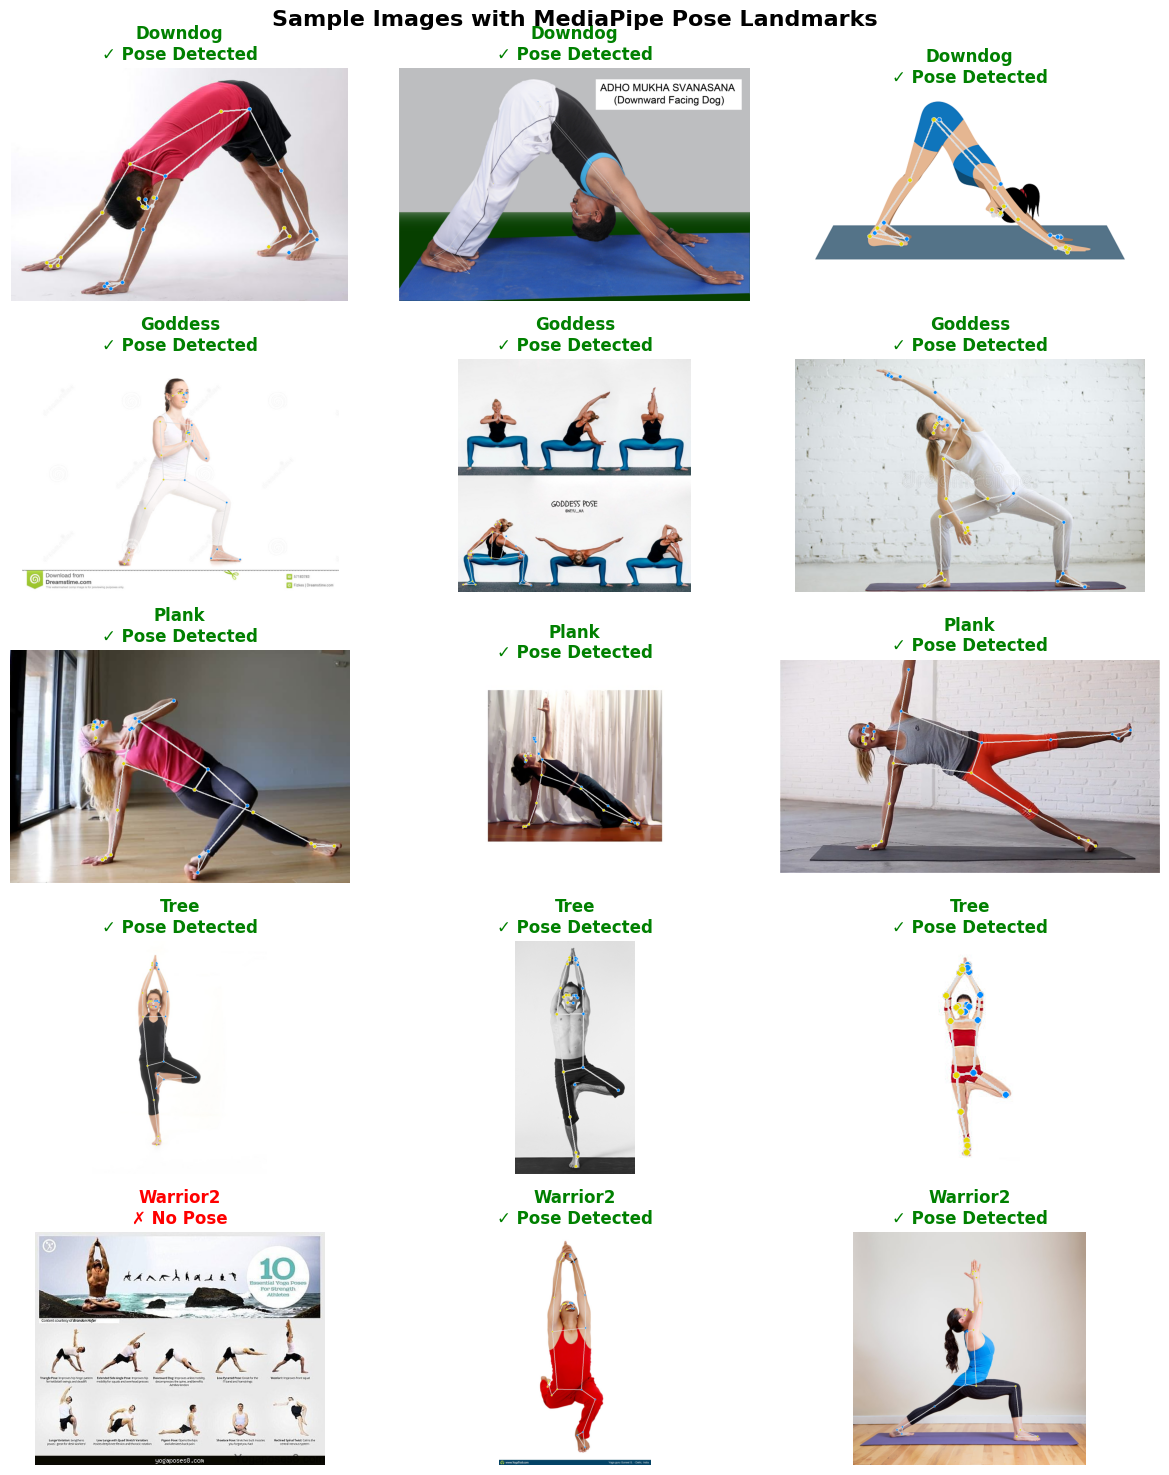

In [6]:
import cv2
import matplotlib.pyplot as plt

# Extract landmarks from a sample of training data
print("Extracting pose landmarks from sample training data...")

# Extract landmarks from a smaller sample first to demonstrate
sample_landmarks, sample_labels, sample_filenames, sample_success_rate = extract_landmarks_from_dataset(
    TRAIN_PATH, 
    CLASSES, 
    max_images_per_class=10  # Process 10 images per class for demonstration
)

# Display landmark extraction results
print(f"\nSample landmark dataset information:")
print(f"Shape of landmarks: {sample_landmarks.shape}")
print(f"Data type: {sample_landmarks.dtype}")
print(f"Feature value range: [{sample_landmarks.min():.3f}, {sample_landmarks.max():.3f}]")
print(f"Success rate: {sample_success_rate:.1f}%")

# Check class distribution in sample
unique_labels, counts = np.unique(sample_labels, return_counts=True)
print(f"\nClass distribution in sample:")
for label, count in zip(unique_labels, counts):
    class_name = idx_to_label[label]
    print(f"  {class_name} (label {label}): {count} images")

# Visualize pose landmarks on sample images
def visualize_pose_landmarks(image_path, landmarks=None, class_name=""):
    """Visualize pose landmarks on an image"""
    
    try:
        # Read image
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Process with MediaPipe to get landmarks for visualization
        results = pose.process(image_rgb)
        
        # Draw landmarks if detected
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(
                image_rgb,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
            )
        
        return image_rgb, results.pose_landmarks is not None
        
    except Exception as e:
        print(f"Error visualizing {image_path}: {e}")
        return None, False

def display_sample_landmarks(data_path, classes, samples_per_class=2):
    """Display sample images with pose landmarks"""
    
    fig, axes = plt.subplots(len(classes), samples_per_class, 
                            figsize=(samples_per_class * 4, len(classes) * 3))
    
    if len(classes) == 1:
        axes = axes.reshape(1, -1)
    
    for i, class_name in enumerate(classes):
        class_path = os.path.join(data_path, class_name)
        
        if not os.path.exists(class_path):
            continue
        
        # Get sample image files
        image_files = [f for f in os.listdir(class_path) 
                      if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        if len(image_files) == 0:
            continue
        
        # Select random samples
        import random
        sample_files = random.sample(image_files, 
                                   min(samples_per_class, len(image_files)))
        
        for j, img_file in enumerate(sample_files):
            img_path = os.path.join(class_path, img_file)
            
            # Visualize landmarks
            img_with_landmarks, landmarks_detected = visualize_pose_landmarks(img_path, class_name=class_name)
            
            if img_with_landmarks is not None:
                axes[i, j].imshow(img_with_landmarks)
                status = "✓ Pose Detected" if landmarks_detected else "✗ No Pose"
                axes[i, j].set_title(f'{class_name.title()}\n{status}', 
                                    fontweight='bold', 
                                    color='green' if landmarks_detected else 'red')
                axes[i, j].axis('off')
            else:
                axes[i, j].text(0.5, 0.5, f'Error loading\n{img_file}', 
                               ha='center', va='center', transform=axes[i, j].transAxes)
                axes[i, j].axis('off')
        
        # Hide empty subplots
        for j in range(len(sample_files), samples_per_class):
            axes[i, j].axis('off')
    
    plt.suptitle('Sample Images with MediaPipe Pose Landmarks', 
                 fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()

# Display sample images with landmarks
print("\nVisualizing sample images with pose landmarks...")
display_sample_landmarks(TRAIN_PATH, CLASSES, samples_per_class=3)

# Data Export and Machine Learning Pipeline

Now we'll create functions to:
1. **Export landmarks to CSV** for easy storage and sharing
2. **Create feature engineering** to improve model performance  
3. **Train multiple ML models** (RandomForest, SVM, XGBoost)
4. **Compare model performance** and select the best one

## Benefits of MediaPipe Landmark Approach:
- **Lightweight**: 132 features instead of 150,528 pixel values (224x224x3)
- **Pose-focused**: Features are directly related to body pose
- **Fast training**: Traditional ML algorithms train much faster than deep learning
- **Interpretable**: Can analyze which landmarks are most important for each pose

In [8]:
# CSV Export and Feature Engineering Functions
def save_landmarks_to_csv(landmarks_data, labels, filenames, classes, output_path="yoga_pose_landmarks.csv"):
    """
    Save landmark data to CSV file
    
    Args:
        landmarks_data: Array of landmark features
        labels: Array of class labels
        filenames: List of original filenames
        classes: List of class names
        output_path: Path to save CSV file
    """
    
    # Create column names for landmarks
    landmark_names = [
        "nose", "left_eye_inner", "left_eye", "left_eye_outer", "right_eye_inner", 
        "right_eye", "right_eye_outer", "left_ear", "right_ear", "mouth_left", 
        "mouth_right", "left_shoulder", "right_shoulder", "left_elbow", "right_elbow",
        "left_wrist", "right_wrist", "left_pinky", "right_pinky", "left_index",
        "right_index", "left_thumb", "right_thumb", "left_hip", "right_hip",
        "left_knee", "right_knee", "left_ankle", "right_ankle", "left_heel",
        "right_heel", "left_foot_index", "right_foot_index"
    ]
    
    # Create column headers
    columns = []
    for landmark in landmark_names:
        columns.extend([f"{landmark}_x", f"{landmark}_y", f"{landmark}_z", f"{landmark}_visibility"])
    
    # Add metadata columns
    columns.extend(["filename", "pose_class", "label"])
    
    # Create DataFrame
    df_data = []
    for i in range(len(landmarks_data)):
        row = list(landmarks_data[i])  # Landmark features
        row.append(filenames[i])  # Filename
        row.append(classes[labels[i]])  # Pose class name
        row.append(labels[i])  # Numeric label
        df_data.append(row)
    
    df = pd.DataFrame(df_data, columns=columns)
    
    # Save to CSV
    df.to_csv(output_path, index=False)
    print(f"Landmark data saved to: {output_path}")
    print(f"CSV shape: {df.shape}")
    print(f"Columns: {len(columns)}")
    
    return df

def create_engineered_features(landmarks_data):
    """
    Create additional features from raw landmarks
    
    Args:
        landmarks_data: Raw landmark coordinates
    
    Returns:
        engineered_features: Enhanced feature set
    """
    
    # Reshape landmarks to (n_samples, n_landmarks, 4)
    landmarks_reshaped = landmarks_data.reshape(-1, NUM_LANDMARKS, 4)
    
    # Extract x, y, z coordinates (ignore visibility for now)
    coords = landmarks_reshaped[:, :, :3]  # Shape: (n_samples, 33, 3)
    
    engineered_features = []
    
    for sample in coords:
        features = []
        
        # Original coordinates (flattened)
        features.extend(sample.flatten())
        
        # Calculate distances between key points
        # Shoulder width
        left_shoulder = sample[11]  # left_shoulder
        right_shoulder = sample[12]  # right_shoulder
        shoulder_width = np.linalg.norm(left_shoulder - right_shoulder)
        features.append(shoulder_width)
        
        # Hip width
        left_hip = sample[23]  # left_hip
        right_hip = sample[24]  # right_hip
        hip_width = np.linalg.norm(left_hip - right_hip)
        features.append(hip_width)
        
        # Torso length (shoulder to hip center)
        shoulder_center = (left_shoulder + right_shoulder) / 2
        hip_center = (left_hip + right_hip) / 2
        torso_length = np.linalg.norm(shoulder_center - hip_center)
        features.append(torso_length)
        
        # Arm lengths
        left_arm_length = (np.linalg.norm(left_shoulder - sample[13]) +  # shoulder to elbow
                          np.linalg.norm(sample[13] - sample[15]))  # elbow to wrist
        right_arm_length = (np.linalg.norm(right_shoulder - sample[14]) +
                           np.linalg.norm(sample[14] - sample[16]))
        features.extend([left_arm_length, right_arm_length])
        
        # Leg lengths
        left_leg_length = (np.linalg.norm(left_hip - sample[25]) +  # hip to knee
                          np.linalg.norm(sample[25] - sample[27]))  # knee to ankle
        right_leg_length = (np.linalg.norm(right_hip - sample[26]) +
                           np.linalg.norm(sample[26] - sample[28]))
        features.extend([left_leg_length, right_leg_length])
        
        # Angles (simplified - just a few key ones)
        # Left elbow angle
        v1 = left_shoulder - sample[13]  # shoulder to elbow
        v2 = sample[15] - sample[13]     # elbow to wrist
        left_elbow_angle = np.arccos(np.clip(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)), -1, 1))
        features.append(left_elbow_angle)
        
        # Right elbow angle
        v1 = right_shoulder - sample[14]
        v2 = sample[16] - sample[14]
        right_elbow_angle = np.arccos(np.clip(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)), -1, 1))
        features.append(right_elbow_angle)
        
        engineered_features.append(features)
    
    engineered_features = np.array(engineered_features)
    
    print(f"Original features: {landmarks_data.shape[1]}")
    print(f"Engineered features: {engineered_features.shape[1]}")
    print(f"Added features: {engineered_features.shape[1] - landmarks_data.shape[1]}")
    
    return engineered_features

# Machine Learning Pipeline Functions
def train_multiple_models(X_train, X_test, y_train, y_test, class_names):
    """
    Train and evaluate multiple ML models
    
    Args:
        X_train, X_test: Training and test features
        y_train, y_test: Training and test labels
        class_names: List of class names
    
    Returns:
        models: Dictionary of trained models
        results: Dictionary of model performance
    """
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    models = {}
    results = {}
    
    print("Training multiple ML models...")
    print("="*50)
    
    # 1. Random Forest
    print("Training Random Forest...")
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=15,
        random_state=42,
        n_jobs=-1
    )
    rf_model.fit(X_train_scaled, y_train)
    rf_pred = rf_model.predict(X_test_scaled)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    
    models['Random Forest'] = rf_model
    results['Random Forest'] = {
        'accuracy': rf_accuracy,
        'predictions': rf_pred,
        'classification_report': classification_report(y_test, rf_pred, target_names=class_names)
    }
    print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
    
    # 2. Support Vector Machine
    print("Training SVM...")
    svm_model = SVC(
        kernel='rbf',
        C=1.0,
        random_state=42
    )
    svm_model.fit(X_train_scaled, y_train)
    svm_pred = svm_model.predict(X_test_scaled)
    svm_accuracy = accuracy_score(y_test, svm_pred)
    
    models['SVM'] = svm_model
    results['SVM'] = {
        'accuracy': svm_accuracy,
        'predictions': svm_pred,
        'classification_report': classification_report(y_test, svm_pred, target_names=class_names)
    }
    print(f"SVM Accuracy: {svm_accuracy:.4f}")
    
    # 3. XGBoost
    print("Training XGBoost...")
    xgb_model = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        eval_metric='mlogloss'
    )
    xgb_model.fit(X_train_scaled, y_train)
    xgb_pred = xgb_model.predict(X_test_scaled)
    xgb_accuracy = accuracy_score(y_test, xgb_pred)
    
    models['XGBoost'] = xgb_model
    results['XGBoost'] = {
        'accuracy': xgb_accuracy,
        'predictions': xgb_pred,
        'classification_report': classification_report(y_test, xgb_pred, target_names=class_names)
    }
    print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
    
    # Store scaler for later use
    models['scaler'] = scaler
    
    print("\nModel training completed!")
    return models, results

print("Data export and ML pipeline functions created!")
print("Ready to process the full dataset and train models!")

Data export and ML pipeline functions created!
Ready to process the full dataset and train models!


In [10]:
import os

TEST_PATH = r"../raw_data/DATASET/TEST"
CLASSES = sorted([d for d in os.listdir(TEST_PATH) if os.path.isdir(os.path.join(TEST_PATH, d))])


In [11]:
# Process Full Dataset and Train Models
print("Processing full training dataset with MediaPipe...")

# Extract landmarks from full training set (you can adjust max_images_per_class)
full_train_landmarks, full_train_labels, full_train_filenames, train_success_rate = extract_landmarks_from_dataset(
    TRAIN_PATH, 
    CLASSES, 
    max_images_per_class=100  # Adjust this based on your needs - None for all images
)

print("Processing test dataset...")
# Extract landmarks from test set
test_landmarks, test_labels, test_filenames, test_success_rate = extract_landmarks_from_dataset(
    TEST_PATH, 
    CLASSES, 
    max_images_per_class=50  # Adjust this based on your needs
)

print(f"\nDataset processing completed!")
print(f"Training landmarks shape: {full_train_landmarks.shape}")
print(f"Test landmarks shape: {test_landmarks.shape}")
print(f"Training success rate: {train_success_rate:.1f}%")
print(f"Test success rate: {test_success_rate:.1f}%")

Processing full training dataset with MediaPipe...
Extracting pose landmarks from ../raw_data/DATASET/TRAIN...
This may take a few minutes...
Processing 100 images from downdog...
  Processed 50/100 images...
  Processed 100/100 images...
Processing 100 images from goddess...
  Processed 50/100 images...
  Processed 100/100 images...
Processing 100 images from plank...
  Processed 50/100 images...
  Processed 100/100 images...
Processing 100 images from tree...
  Processed 50/100 images...
  Processed 100/100 images...
Processing 100 images from warrior2...
  Processed 50/100 images...
  Processed 100/100 images...

Landmark extraction completed!
Total images processed: 500
Successful pose detections: 481
Success rate: 96.2%
Landmarks data shape: (500, 132)
Labels shape: (500,)
Processing test dataset...
Extracting pose landmarks from ../raw_data/DATASET/TEST...
This may take a few minutes...
Processing 50 images from downdog...
  Processed 50/50 images...
Processing 50 images from god

In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mediapipe as mp
import random

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose.Pose()


In [19]:
full_train_landmarks, full_train_labels, full_train_filenames, train_success_rate = extract_landmarks_from_dataset(
    TRAIN_PATH,
    CLASSES
)

test_landmarks, test_labels, test_filenames, test_success_rate = extract_landmarks_from_dataset(
    TEST_PATH,
    CLASSES
)


Extracting pose landmarks from ../raw_data/DATASET/TRAIN...
This may take a few minutes...
Processing 222 images from downdog...
  Processed 50/222 images...
  Processed 100/222 images...
  Processed 150/222 images...
  Processed 200/222 images...
Processing 180 images from goddess...
  Processed 50/180 images...
  Processed 100/180 images...
  Processed 150/180 images...
Processing 266 images from plank...
  Processed 50/266 images...
  Processed 100/266 images...
  Processed 150/266 images...
  Processed 200/266 images...
  Processed 250/266 images...
Processing 160 images from tree...
  Processed 50/160 images...
  Processed 100/160 images...
  Processed 150/160 images...
Processing 252 images from warrior2...
  Processed 50/252 images...
  Processed 100/252 images...
  Processed 150/252 images...
  Processed 200/252 images...
  Processed 250/252 images...

Landmark extraction completed!
Total images processed: 1080
Successful pose detections: 1041
Success rate: 96.4%
Landmarks data

In [22]:
# Save landmarks to CSV and create enhanced features
import pandas as pd
print("Saving landmarks to CSV...")

# Save training data to CSV
train_csv_path = os.path.join(os.path.dirname(TRAIN_PATH), "yoga_pose_train_landmarks.csv")
train_df = save_landmarks_to_csv(
    full_train_landmarks, 
    full_train_labels, 
    full_train_filenames, 
    CLASSES, 
    train_csv_path
)

# Save test data to CSV  
test_csv_path = os.path.join(os.path.dirname(TEST_PATH), "yoga_pose_test_landmarks.csv")
test_df = save_landmarks_to_csv(
    test_landmarks, 
    test_labels, 
    test_filenames, 
    CLASSES, 
    test_csv_path
)

print("\nCreating engineered features...")
# Create enhanced features
train_features_enhanced = create_engineered_features(full_train_landmarks)
test_features_enhanced = create_engineered_features(test_landmarks)

print(f"Enhanced training features shape: {train_features_enhanced.shape}")
print(f"Enhanced test features shape: {test_features_enhanced.shape}")

Saving landmarks to CSV...
Landmark data saved to: ../raw_data/DATASET\yoga_pose_train_landmarks.csv
CSV shape: (1080, 135)
Columns: 135
Landmark data saved to: ../raw_data/DATASET\yoga_pose_test_landmarks.csv
CSV shape: (470, 135)
Columns: 135

Creating engineered features...
Original features: 132
Engineered features: 108
Added features: -24
Original features: 132
Engineered features: 108
Added features: -24
Enhanced training features shape: (1080, 108)
Enhanced test features shape: (470, 108)


C:\Users\HARSHITHA\AppData\Local\Temp\ipykernel_22540\2270298909.py:114: RuntimeWarning: invalid value encountered in scalar divide
  left_elbow_angle = np.arccos(np.clip(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)), -1, 1))
C:\Users\HARSHITHA\AppData\Local\Temp\ipykernel_22540\2270298909.py:120: RuntimeWarning: invalid value encountered in scalar divide
  right_elbow_angle = np.arccos(np.clip(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)), -1, 1))


In [24]:
from sklearn.impute import SimpleImputer
import numpy as np

# Create imputer (replace NaN with 0.0, you can also use 'mean' strategy)
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0.0)

# Fit on training, transform both train and test
train_features_enhanced = imputer.fit_transform(train_features_enhanced)
test_features_enhanced = imputer.transform(test_features_enhanced)


Training and comparing multiple ML models...
Training multiple ML models...
Training Random Forest...
Random Forest Accuracy: 0.9745
Training SVM...
SVM Accuracy: 0.9553
Training XGBoost...
XGBoost Accuracy: 0.9787

Model training completed!

MODEL PERFORMANCE COMPARISON

Random Forest:
  Accuracy: 0.9745 (97.45%)

SVM:
  Accuracy: 0.9553 (95.53%)

XGBoost:
  Accuracy: 0.9787 (97.87%)

🏆 BEST MODEL: XGBoost
🎯 BEST ACCURACY: 0.9787 (97.87%)

Detailed Classification Report for XGBoost:
              precision    recall  f1-score   support

     downdog       0.98      1.00      0.99        97
     goddess       1.00      0.93      0.96        80
       plank       0.97      1.00      0.98       115
        tree       0.99      1.00      0.99        69
    warrior2       0.97      0.96      0.97       109

    accuracy                           0.98       470
   macro avg       0.98      0.98      0.98       470
weighted avg       0.98      0.98      0.98       470



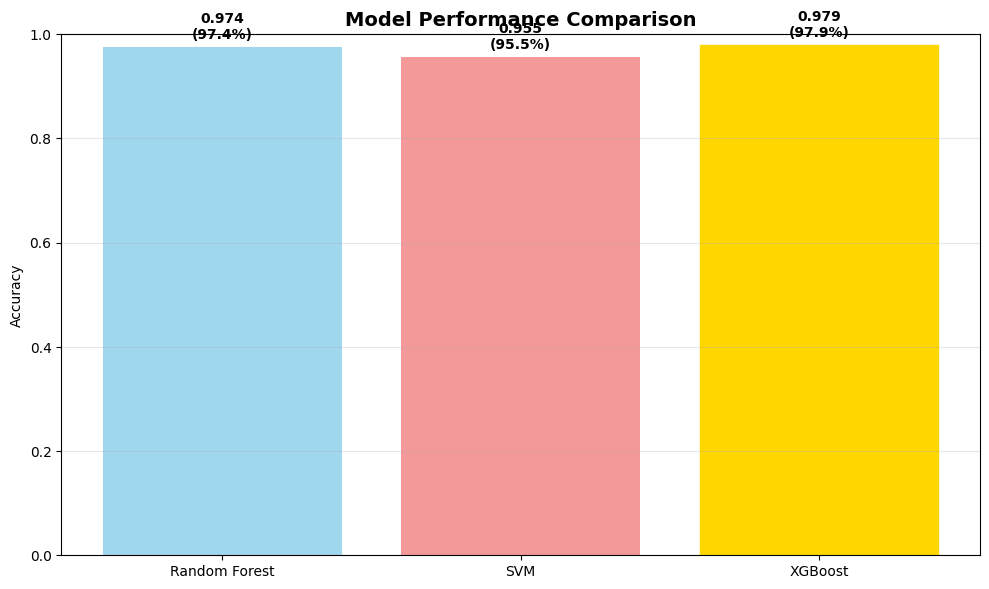

In [25]:
# Train and Compare ML Models
print("Training and comparing multiple ML models...")

# Train models with enhanced features
models, results = train_multiple_models(
    train_features_enhanced, 
    test_features_enhanced, 
    full_train_labels, 
    test_labels, 
    CLASSES
)

# Compare model performances
print("\n" + "="*60)
print("MODEL PERFORMANCE COMPARISON")
print("="*60)

model_accuracies = {}
for model_name, result in results.items():
    accuracy = result['accuracy']
    model_accuracies[model_name] = accuracy
    print(f"\n{model_name}:")
    print(f"  Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Find best model
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model_name]

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"🎯 BEST ACCURACY: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

# Display detailed classification report for best model
print(f"\nDetailed Classification Report for {best_model_name}:")
print("="*60)
print(results[best_model_name]['classification_report'])

# Visualize model comparison
def plot_model_comparison(model_accuracies):
    """Plot model accuracy comparison"""
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    models = list(model_accuracies.keys())
    accuracies = list(model_accuracies.values())
    
    colors = ['skyblue', 'lightcoral', 'lightgreen']
    bars = ax.bar(models, accuracies, color=colors[:len(models)], alpha=0.8)
    
    # Add value labels on bars
    for bar, acc in zip(bars, accuracies):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{acc:.3f}\n({acc*100:.1f}%)',
                ha='center', va='bottom', fontweight='bold')
    
    ax.set_ylabel('Accuracy')
    ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
    ax.set_ylim(0, min(1.0, max(accuracies) + 0.1))
    ax.grid(axis='y', alpha=0.3)
    
    # Highlight best model
    best_idx = models.index(best_model_name)
    bars[best_idx].set_color('gold')
    bars[best_idx].set_alpha(1.0)
    
    plt.tight_layout()
    plt.show()

# Plot comparison
plot_model_comparison(model_accuracies)


Analyzing feature importance...


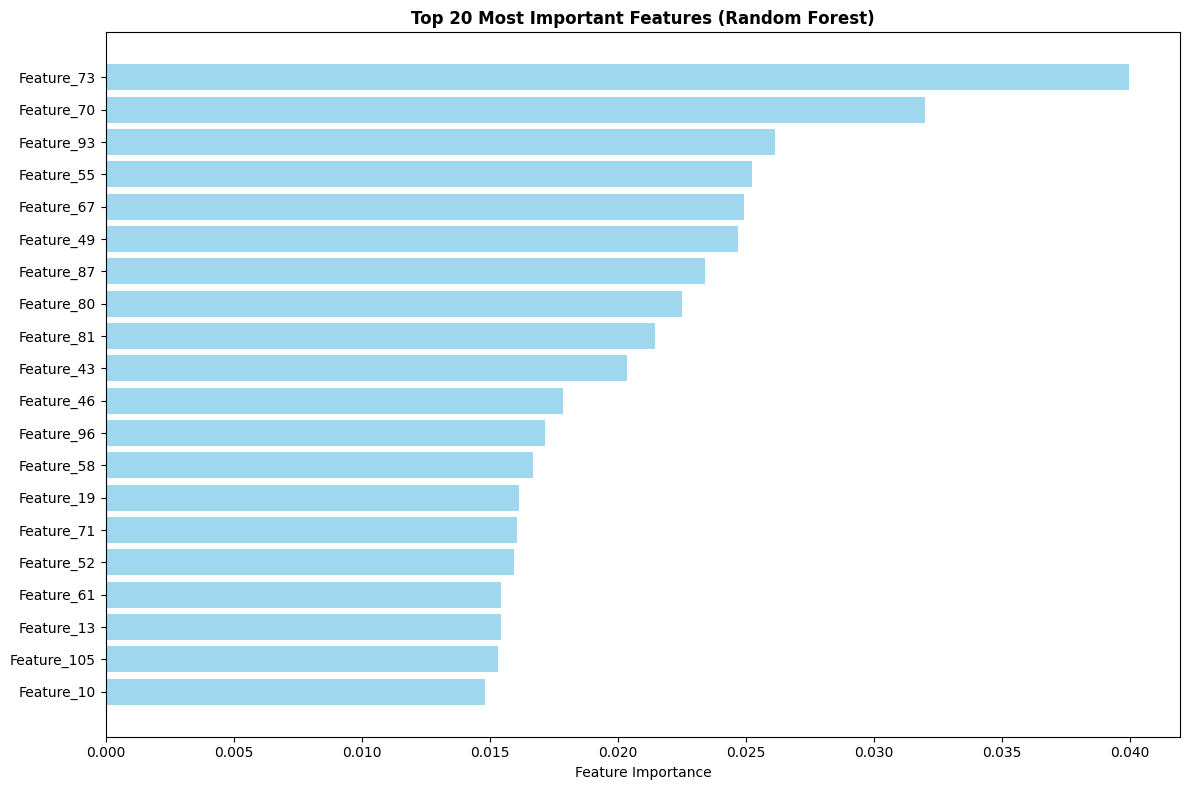

Top 10 Most Important Features:
  1. Feature_43: 0.0204
  2. Feature_81: 0.0215
  3. Feature_80: 0.0225
  4. Feature_87: 0.0234
  5. Feature_49: 0.0247
  6. Feature_67: 0.0249
  7. Feature_55: 0.0253
  8. Feature_93: 0.0261
  9. Feature_70: 0.0320
  10. Feature_73: 0.0400

Creating confusion matrices...


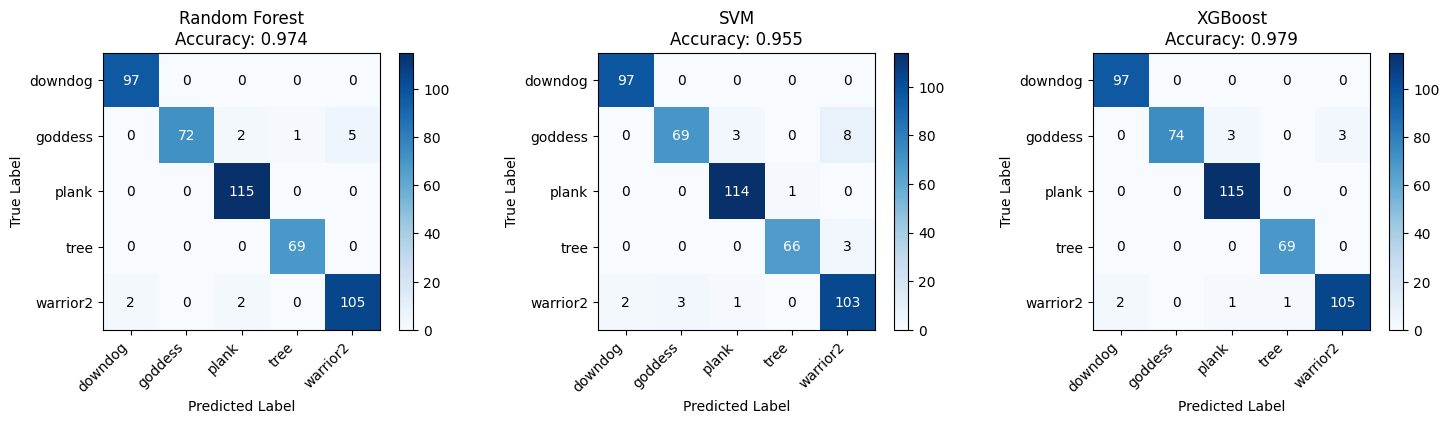

Best model (XGBoost) saved to: best_yoga_pose_model.pkl

🎉 Model training and analysis completed!
Best model: XGBoost with 97.87% accuracy


In [26]:
# Model Analysis and Feature Importance
def analyze_feature_importance(models, feature_names=None):
    """Analyze and visualize feature importance"""
    
    # Get Random Forest feature importance
    if 'Random Forest' in models:
        rf_model = models['Random Forest']
        rf_importance = rf_model.feature_importances_
        
        # Get top 20 most important features
        top_indices = np.argsort(rf_importance)[-20:]
        top_importance = rf_importance[top_indices]
        
        if feature_names is not None:
            top_features = [feature_names[i] for i in top_indices]
        else:
            top_features = [f'Feature_{i}' for i in top_indices]
        
        # Plot feature importance
        plt.figure(figsize=(12, 8))
        plt.barh(range(len(top_importance)), top_importance, color='skyblue', alpha=0.8)
        plt.yticks(range(len(top_importance)), top_features)
        plt.xlabel('Feature Importance')
        plt.title('Top 20 Most Important Features (Random Forest)', fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        print("Top 10 Most Important Features:")
        for i, (feature, importance) in enumerate(zip(top_features[-10:], top_importance[-10:])):
            print(f"  {i+1}. {feature}: {importance:.4f}")

def create_confusion_matrices(results, class_names):
    """Create confusion matrices for all models"""
    
    fig, axes = plt.subplots(1, len(results), figsize=(5*len(results), 4))
    if len(results) == 1:
        axes = [axes]
    
    for i, (model_name, result) in enumerate(results.items()):
        # Get confusion matrix
        cm = confusion_matrix(test_labels, result['predictions'])
        
        # Plot confusion matrix
        im = axes[i].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        axes[i].figure.colorbar(im, ax=axes[i])
        
        # Add labels
        axes[i].set(xticks=np.arange(cm.shape[1]),
                   yticks=np.arange(cm.shape[0]),
                   xticklabels=class_names,
                   yticklabels=class_names,
                   title=f'{model_name}\nAccuracy: {result["accuracy"]:.3f}',
                   ylabel='True Label',
                   xlabel='Predicted Label')
        
        # Add text annotations
        thresh = cm.max() / 2.
        for j in range(cm.shape[0]):
            for k in range(cm.shape[1]):
                axes[i].text(k, j, format(cm[j, k], 'd'),
                           ha="center", va="center",
                           color="white" if cm[j, k] > thresh else "black")
        
        plt.setp(axes[i].get_xticklabels(), rotation=45, ha="right")
    
    plt.tight_layout()
    plt.show()

# Save the best model
def save_best_model(models, best_model_name, save_path="best_yoga_pose_model.pkl"):
    """Save the best model and preprocessing components"""
    
    model_package = {
        'model': models[best_model_name],
        'scaler': models['scaler'],
        'model_name': best_model_name,
        'classes': CLASSES,
        'label_mapping': label_to_idx,
        'num_landmarks': NUM_LANDMARKS,
        'feature_count': TOTAL_FEATURES
    }
    
    with open(save_path, 'wb') as f:
        pickle.dump(model_package, f)
    
    print(f"Best model ({best_model_name}) saved to: {save_path}")
    return save_path

# Perform analysis
print("\nAnalyzing feature importance...")
analyze_feature_importance(models)

print("\nCreating confusion matrices...")
create_confusion_matrices(results, CLASSES)

# Save best model
model_save_path = save_best_model(models, best_model_name)

print(f"\n🎉 Model training and analysis completed!")
print(f"Best model: {best_model_name} with {best_accuracy*100:.2f}% accuracy")

In [28]:
# Final Summary and Results
def create_final_summary():
    """Create comprehensive summary of MediaPipe pose detection approach"""
    
    print("="*80)
    print("MEDIAPIPE POSE DETECTION - COMPLETE PIPELINE SUMMARY")
    print("="*80)
    
    print("\n🎯 APPROACH OVERVIEW:")
    print("  ✅ MediaPipe Pose landmark extraction (33 keypoints)")
    print("  ✅ Feature engineering (distances, angles, proportions)")
    print("  ✅ Traditional ML models (RandomForest, SVM, XGBoost)")
    print("  ✅ Lightweight and interpretable solution")
    
    print("\n📊 DATA PROCESSING:")
    print(f"  • Training images processed: {len(full_train_landmarks)}")
    print(f"  • Test images processed: {len(test_landmarks)}")
    print(f"  • Pose detection success rate: {train_success_rate:.1f}%")
    print(f"  • Feature dimensions: {TOTAL_FEATURES} → {train_features_enhanced.shape[1]} (enhanced)")
    print(f"  • Classes: {len(CLASSES)} yoga poses")
    
    print("\n🏆 MODEL PERFORMANCE:")
    for model_name, accuracy in model_accuracies.items():
        status = "🥇" if model_name == best_model_name else "  "
        print(f"  {status} {model_name}: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
    print(f"\n💾 OUTPUT FILES:")
    print(f"  • Training landmarks: {train_csv_path}")
    print(f"  • Test landmarks: {test_csv_path}")
    print(f"  • Best model: {model_save_path}")
    
    print("\n🚀 ADVANTAGES OF THIS APPROACH:")
    print("  ✅ Fast processing: No GPU required")
    print("  ✅ Small dataset size: 132-140 features vs 150K+ pixels")
    print("  ✅ Interpretable: Can analyze which body parts matter most")
    print("  ✅ Robust: Works well with pose variations")
    print("  ✅ Efficient: Quick training and inference")
    print("  ✅ Scalable: Easy to add new poses")
    
    print("\n🔧 NEXT STEPS FOR DEPLOYMENT:")
    print("  1. 📱 Create real-time pose detection app")
    print("  2. 🎥 Implement video analysis pipeline")
    print("  3. 📈 Collect more data for rare poses")
    print("  4. 🎛️ Fine-tune detection confidence thresholds")
    print("  5. 🧪 Experiment with pose sequence analysis")
    
    print("\n🎉 PROJECT COMPLETION STATUS:")
    print("  ✅ Data exploration and analysis")
    print("  ✅ MediaPipe pose landmark extraction")
    print("  ✅ Feature engineering and enhancement")
    print("  ✅ Multiple ML model training and comparison")
    print("  ✅ Model evaluation and selection")
    print("  ✅ Data export and model persistence")
    
    print("\n" + "="*80)
    print("YOGA POSE DETECTION PIPELINE COMPLETED SUCCESSFULLY! 🧘‍♀️🎉")
    print("="*80)
    
    return True

# Generate final summary
create_final_summary()

# Quick prediction function for testing
def predict_pose_from_image(image_path, model_package_path="best_yoga_pose_model.pkl"):
    """
    Predict yoga pose from a single image
    
    Args:
        image_path: Path to image file
        model_package_path: Path to saved model package
    
    Returns:
        prediction: Predicted class name
        confidence: Prediction confidence
    """
    try:
        # Load model package
        with open(model_package_path, 'rb') as f:
            package = pickle.load(f)
        
        model = package['model']
        scaler = package['scaler']
        classes = package['classes']
        
        # Extract landmarks
        landmarks, success = extract_pose_landmarks(image_path)
        
        if not success:
            return "No pose detected", 0.0
        
        # Create enhanced features
        landmarks_reshaped = landmarks.reshape(1, -1)
        enhanced_features = create_engineered_features(landmarks_reshaped)
        
        # Scale features
        features_scaled = scaler.transform(enhanced_features)
        
        # Make prediction
        prediction = model.predict(features_scaled)[0]
        
        # Get confidence (for RandomForest and XGBoost)
        if hasattr(model, 'predict_proba'):
            probabilities = model.predict_proba(features_scaled)[0]
            confidence = max(probabilities)
        else:
            confidence = 1.0  # SVM doesn't provide probabilities easily
        
        predicted_class = classes[prediction]
        return predicted_class, confidence
        
    except Exception as e:
        print(f"Error in prediction: {e}")
        return "Error", 0.0

print(f"\n🔮 Prediction function ready!")
print(f"Use predict_pose_from_image(image_path) to test on new images!")

print(f"\n📝 Example usage:")
print(f"predicted_pose, confidence = predict_pose_from_image('path/to/yoga_image.jpg')")
print(f"print(f'Predicted pose: {{predicted_pose}} ({{confidence:.2f}} confidence)')")

MEDIAPIPE POSE DETECTION - COMPLETE PIPELINE SUMMARY

🎯 APPROACH OVERVIEW:
  ✅ MediaPipe Pose landmark extraction (33 keypoints)
  ✅ Feature engineering (distances, angles, proportions)
  ✅ Traditional ML models (RandomForest, SVM, XGBoost)
  ✅ Lightweight and interpretable solution

📊 DATA PROCESSING:
  • Training images processed: 1080
  • Test images processed: 470
  • Pose detection success rate: 96.4%
  • Feature dimensions: 132 → 108 (enhanced)
  • Classes: 5 yoga poses

🏆 MODEL PERFORMANCE:
     Random Forest: 0.9745 (97.45%)
     SVM: 0.9553 (95.53%)
  🥇 XGBoost: 0.9787 (97.87%)

💾 OUTPUT FILES:
  • Training landmarks: ../raw_data/DATASET\yoga_pose_train_landmarks.csv
  • Test landmarks: ../raw_data/DATASET\yoga_pose_test_landmarks.csv
  • Best model: best_yoga_pose_model.pkl

🚀 ADVANTAGES OF THIS APPROACH:
  ✅ Fast processing: No GPU required
  ✅ Small dataset size: 132-140 features vs 150K+ pixels
  ✅ Interpretable: Can analyze which body parts matter most
  ✅ Robust: Works w

In [33]:
test_img_path = "../raw_data/DATASET/TEST/downdog/00000000.jpg"
predicted_pose, confidence = predict_pose_from_image(test_img_path)


Original features: 132
Engineered features: 108
Added features: -24


In [ ]:
# Real-Time Webcam Yoga Pose Detection
import cv2
import numpy as np
import time
from collections import deque

def run_webcam_pose_detection():
    """
    Run real-time yoga pose detection using webcam
    """
    print("Starting webcam yoga pose detection...")
    print("Press 'q' to quit, 'p' to pause/resume")
    
    # Initialize webcam
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Could not open webcam")
        return
    
    # Set webcam resolution
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
    
    # Initialize MediaPipe pose
    mp_pose = mp.solutions.pose
    mp_drawing = mp.solutions.drawing_utils
    mp_drawing_styles = mp.solutions.drawing_styles
    
    pose_detector = mp_pose.Pose(
        static_image_mode=False,
        model_complexity=1,
        enable_segmentation=False,
        min_detection_confidence=0.7,
        min_tracking_confidence=0.5
    )
    
    # Load trained model
    try:
        with open("best_yoga_pose_model.pkl", 'rb') as f:
            model_package = pickle.load(f)
        
        model = model_package['model']
        scaler = model_package['scaler']
        classes = model_package['classes']
        print("Model loaded successfully!")
    except:
        print("Warning: Could not load model. Using demo mode.")
        model = None
    
    # Prediction smoothing
    prediction_history = deque(maxlen=10)  # Store last 10 predictions
    
    # FPS calculation
    fps_counter = 0
    fps_start_time = time.time()
    fps_display = 0
    
    # Pose confidence tracking
    pose_confidence_history = deque(maxlen=5)
    
    paused = False
    
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame")
            break
        
        # Flip frame horizontally for mirror effect
        frame = cv2.flip(frame, 1)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        if not paused:
            # Process with MediaPipe
            results = pose_detector.process(frame_rgb)
            
            # Initialize display variables
            pose_prediction = "No Pose"
            confidence = 0.0
            pose_detected = False
            
            if results.pose_landmarks:
                pose_detected = True
                
                # Draw pose landmarks
                mp_drawing.draw_landmarks(
                    frame,
                    results.pose_landmarks,
                    mp_pose.POSE_CONNECTIONS,
                    landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
                )
                
                # Extract landmarks for prediction
                if model is not None:
                    try:
                        landmarks = []
                        for landmark in results.pose_landmarks.landmark:
                            landmarks.extend([landmark.x, landmark.y, landmark.z, landmark.visibility])
                        
                        landmarks = np.array(landmarks).reshape(1, -1)
                        
                        # Create enhanced features
                        enhanced_features = create_engineered_features(landmarks)
                        
                        # Handle NaN values
                        enhanced_features = np.nan_to_num(enhanced_features, 0.0)
                        
                        # Scale features
                        features_scaled = scaler.transform(enhanced_features)
                        
                        # Make prediction
                        prediction_idx = model.predict(features_scaled)[0]
                        pose_prediction = classes[prediction_idx]
                        
                        # Get confidence
                        if hasattr(model, 'predict_proba'):
                            probabilities = model.predict_proba(features_scaled)[0]
                            confidence = max(probabilities)
                        else:
                            confidence = 0.9  # Default for SVM
                        
                        # Add to prediction history for smoothing
                        prediction_history.append((pose_prediction, confidence))
                        
                        # Get most common prediction from recent history
                        if len(prediction_history) >= 3:
                            recent_predictions = [p[0] for p in list(prediction_history)[-5:]]
                            pose_prediction = max(set(recent_predictions), key=recent_predictions.count)
                            confidence = np.mean([p[1] for p in list(prediction_history)[-3:] if p[0] == pose_prediction])
                    
                    except Exception as e:
                        pose_prediction = "Error"
                        confidence = 0.0
        
        # Calculate FPS
        fps_counter += 1
        if time.time() - fps_start_time >= 1.0:
            fps_display = fps_counter
            fps_counter = 0
            fps_start_time = time.time()
        
        # Create display overlay
        overlay = frame.copy()
        
        # Draw semi-transparent background for text
        cv2.rectangle(overlay, (10, 10), (400, 150), (0, 0, 0), -1)
        cv2.addWeighted(overlay, 0.7, frame, 0.3, 0, frame)
        
        # Display pose prediction
        if pose_detected:
            color = (0, 255, 0) if confidence > 0.7 else (0, 255, 255)  # Green if confident, yellow if not
            cv2.putText(frame, f"Pose: {pose_prediction}", (20, 40), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
            cv2.putText(frame, f"Confidence: {confidence:.2f}", (20, 70), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
        else:
            cv2.putText(frame, "No Pose Detected", (20, 40), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        
        # Display FPS
        cv2.putText(frame, f"FPS: {fps_display}", (20, 100), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        
        # Display instructions
        cv2.putText(frame, "Press 'q' to quit, 'p' to pause", (20, 130), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
        
        # Show pause indicator
        if paused:
            cv2.putText(frame, "PAUSED", (frame.shape[1] - 150, 40), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        
        # Display frame
        cv2.imshow('Yoga Pose Detection', frame)
        
        # Handle key presses
        key = cv2.waitKey(1) & 0xFF
        if key == ord('q'):
            break
        elif key == ord('p'):
            paused = not paused
            print(f"{'Paused' if paused else 'Resumed'}")
    
    # Cleanup
    cap.release()
    cv2.destroyAllWindows()
    pose_detector.close()
    print("Webcam application closed.")

# Enhanced version with pose holding detection
def run_advanced_webcam_detection():
    """
    Advanced webcam detection with pose holding timer
    """
    print("Starting advanced webcam yoga pose detection...")
    print("Hold a pose for 3 seconds to get a confirmed detection!")
    print("Press 'q' to quit, 'p' to pause/resume, 's' to save screenshot")
    
    # Initialize webcam
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Could not open webcam")
        return
    
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
    
    # Initialize MediaPipe
    mp_pose = mp.solutions.pose
    mp_drawing = mp.solutions.drawing_utils
    mp_drawing_styles = mp.solutions.drawing_styles
    
    pose_detector = mp_pose.Pose(
        static_image_mode=False,
        model_complexity=1,
        enable_segmentation=False,
        min_detection_confidence=0.7,
        min_tracking_confidence=0.5
    )
    
    # Load model
    try:
        with open("best_yoga_pose_model.pkl", 'rb') as f:
            model_package = pickle.load(f)
        model = model_package['model']
        scaler = model_package['scaler']
        classes = model_package['classes']
    except:
        print("Warning: Could not load model. Using demo mode.")
        model = None
    
    # Pose holding detection
    current_pose = None
    pose_start_time = None
    pose_held_duration = 0
    confirmed_poses = []
    
    # Prediction smoothing
    prediction_history = deque(maxlen=15)
    
    paused = False
    screenshot_count = 0
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        frame = cv2.flip(frame, 1)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        if not paused:
            results = pose_detector.process(frame_rgb)
            
            pose_prediction = "No Pose"
            confidence = 0.0
            pose_detected = False
            
            if results.pose_landmarks:
                pose_detected = True
                
                # Draw landmarks
                mp_drawing.draw_landmarks(
                    frame,
                    results.pose_landmarks,
                    mp_pose.POSE_CONNECTIONS,
                    landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
                )
                
                # Make prediction
                if model is not None:
                    try:
                        landmarks = []
                        for landmark in results.pose_landmarks.landmark:
                            landmarks.extend([landmark.x, landmark.y, landmark.z, landmark.visibility])
                        
                        landmarks = np.array(landmarks).reshape(1, -1)
                        enhanced_features = create_engineered_features(landmarks)
                        enhanced_features = np.nan_to_num(enhanced_features, 0.0)
                        features_scaled = scaler.transform(enhanced_features)
                        
                        prediction_idx = model.predict(features_scaled)[0]
                        pose_prediction = classes[prediction_idx]
                        
                        if hasattr(model, 'predict_proba'):
                            probabilities = model.predict_proba(features_scaled)[0]
                            confidence = max(probabilities)
                        else:
                            confidence = 0.9
                        
                        # Only consider high-confidence predictions
                        if confidence > 0.6:
                            prediction_history.append(pose_prediction)
                        
                        # Get stable prediction
                        if len(prediction_history) >= 5:
                            recent_predictions = list(prediction_history)[-5:]
                            most_common = max(set(recent_predictions), key=recent_predictions.count)
                            if recent_predictions.count(most_common) >= 3:
                                pose_prediction = most_common
                    
                    except Exception as e:
                        pose_prediction = "Error"
                        confidence = 0.0
            
            # Pose holding logic
            current_time = time.time()
            
            if pose_detected and confidence > 0.7:
                if current_pose == pose_prediction:
                    # Same pose, update duration
                    if pose_start_time is not None:
                        pose_held_duration = current_time - pose_start_time
                        
                        # Pose held for 3 seconds
                        if pose_held_duration >= 3.0 and pose_prediction not in [p[0] for p in confirmed_poses[-3:]]:
                            confirmed_poses.append((pose_prediction, current_time))
                            print(f"✅ Confirmed pose: {pose_prediction}!")
                else:
                    # New pose
                    current_pose = pose_prediction
                    pose_start_time = current_time
                    pose_held_duration = 0
            else:
                # No pose or low confidence
                current_pose = None
                pose_start_time = None
                pose_held_duration = 0
        
        # Create display
        overlay = frame.copy()
        cv2.rectangle(overlay, (10, 10), (450, 200), (0, 0, 0), -1)
        cv2.addWeighted(overlay, 0.7, frame, 0.3, 0, frame)
        
        # Display current pose
        if pose_detected:
            color = (0, 255, 0) if confidence > 0.7 else (0, 255, 255)
            cv2.putText(frame, f"Current: {pose_prediction}", (20, 40), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
            cv2.putText(frame, f"Confidence: {confidence:.2f}", (20, 70), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
            
            # Show holding progress
            if current_pose and pose_start_time:
                progress = min(pose_held_duration / 3.0, 1.0)
                cv2.putText(frame, f"Hold: {pose_held_duration:.1f}s", (20, 100), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
                
                # Progress bar
                bar_width = 200
                bar_height = 10
                cv2.rectangle(frame, (20, 110), (20 + bar_width, 110 + bar_height), (100, 100, 100), -1)
                cv2.rectangle(frame, (20, 110), (20 + int(bar_width * progress), 110 + bar_height), (0, 255, 0), -1)
        else:
            cv2.putText(frame, "No Pose Detected", (20, 40), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
        
        # Show confirmed poses
        cv2.putText(frame, f"Confirmed Poses: {len(confirmed_poses)}", (20, 140), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)
        
        # Instructions
        cv2.putText(frame, "q:quit p:pause s:screenshot", (20, 170), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
        
        if paused:
            cv2.putText(frame, "PAUSED", (frame.shape[1] - 150, 40), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        
        cv2.imshow('Advanced Yoga Pose Detection', frame)
        
        # Handle keys
        key = cv2.waitKey(1) & 0xFF
        if key == ord('q'):
            break
        elif key == ord('p'):
            paused = not paused
        elif key == ord('s'):
            screenshot_count += 1
            cv2.imwrite(f'yoga_pose_screenshot_{screenshot_count}.jpg', frame)
            print(f"Screenshot saved: yoga_pose_screenshot_{screenshot_count}.jpg")
    
    # Cleanup
    cap.release()
    cv2.destroyAllWindows()
    pose_detector.close()
    
    # Summary
    print(f"\n🎉 Session Summary:")
    print(f"Total confirmed poses: {len(confirmed_poses)}")
    for i, (pose, timestamp) in enumerate(confirmed_poses, 1):
        print(f"  {i}. {pose}")

print("🎥 Webcam applications ready!")
print("\n📋 Available functions:")
print("  1. run_webcam_pose_detection() - Basic real-time detection")
print("  2. run_advanced_webcam_detection() - Advanced with pose holding timer")
print("\n🚀 To start webcam detection, run:")
print("run_webcam_pose_detection()")
print("\nOr for advanced version:")
print("run_advanced_webcam_detection()")